In [1]:
import pandas as pd
import pandas_profiling as pdp
import numpy as np
import seaborn as sns
import matplotlib
import requests
import time
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
# import geopy
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

In [2]:
import os
os.getcwd()

'/Users/kyohei/Dropbox/SIGNATE/notebook'

In [34]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train = train.rename(columns={'賃料': 'target', '契約期間': 'Contract', '間取り': 'Room',
                                                      '築年数': 'Passed', '駐車場': 'Parking', '室内設備': 'Facility',
                                                      '放送・通信': 'Internet', '周辺環境': 'Building', '建物構造': 'Material',
                                                      '面積': 'Area', 'キッチン': 'Kitchen', '所在地': 'Place',
                                                      'バス・トイレ': 'Bath', '所在階': 'Floor', 'アクセス': 'Access',
                                                      '方角': 'Angle'})

test = test.rename(columns={'契約期間': 'Contract', '間取り': 'Room', '築年数': 'Passed',
                                                    '駐車場': 'Parking', '室内設備': 'Facility', '放送・通信': 'Internet',
                                                    '周辺環境': 'Building', '建物構造': 'Material', '面積': 'Area',
                                                    'キッチン': 'Kitchen', '所在地': 'Place', 'バス・トイレ': 'Bath',
                                                    '所在階': 'Floor', 'アクセス': 'Access', '方角': 'Angle'})

In [43]:
place = train["Place"].str.replace("東京都", "").str.split("区")
place = pd.DataFrame(place.str, index=["Place", "Place2"]).T
# place = pd.DataFrame(place[0])
# place.columns = ["Place"]
place["Place"]

0          北
1         中央
2         渋谷
3         杉並
4         葛飾
        ... 
31465     板橋
31466    世田谷
31467     江東
31468     中野
31469     豊島
Name: Place, Length: 31470, dtype: object

In [4]:
train

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31465,31466,80000,東京都板橋区蓮根２丁目,都営三田線\t蓮根駅\t徒歩7分\t\t都営三田線\t西台駅\t徒歩10分\t\t都営三田線...,2DK,30年0ヶ月,南,37.9m2,1階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t洗面台独立,ガスコンロ／\tコンロ2口／\t給湯,インターネット対応,エアコン付\tバルコニー／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,鉄骨造,2年間
31466,31467,54500,東京都世田谷区太子堂５丁目17-1,東急田園都市線\t三軒茶屋駅\t徒歩6分\t\t東急世田谷線\t西太子堂駅\t徒歩4分\t\...,1R,39年7ヶ月,西,12.04m2,4階／4階建,専用バス／\t専用トイレ／\tシャワー,ガスコンロ／\tコンロ1口／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタイル張り\t公営水道／...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 458m\t【スーパー】 540m\t【コンビニ】 131m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
31467,31468,125000,東京都江東区南砂４丁目,東西線\t南砂町駅\t徒歩5分\t\t都営新宿線\t大島(東京都)駅\t徒歩26分\t\t東...,3DK,45年10ヶ月,南,60m2,3階／5階建,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座,ガスコンロ／\tコンロ2口,光ファイバー,シューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t都市ガス,駐輪場\t空有\tバイク置き場\t無,【コンビニ】 302m\t【コンビニ】 394m\t【コンビニ】 452m\t【コンビニ】 ...,鉄骨造,2年間
31468,31469,98000,東京都中野区中野２丁目,中央線（快速）\t中野(東京都)駅\t徒歩4分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...,1DK,11年0ヶ月,南,29.59m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t3面採光／\t室内洗濯...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 485m\t【スーパー】 1051m\t【コンビニ】 476m\t【コンビニ】...,木造,2年間


In [24]:
from sklearn.preprocessing import LabelEncoder
place = train["Place"].str.replace("東京都", "").str.split("区")
place = pd.DataFrame(place.str, index=["Place1", "Place2"]).T
place = place.drop("Place2", axis=1)
# カテゴリ変数をループしてlabel encording
place["target"] = train["target"]
place

,Place1,target
0,北,75000
1,中央,76000
2,渋谷,110000
3,杉並,150000
4,葛飾,74000
...,...,...
31465,板橋,80000
31466,世田谷,54500
31467,江東,125000
31468,中野,98000


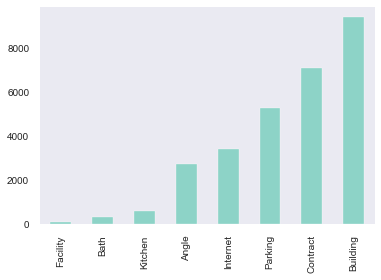

In [45]:
# 訓練データの欠損値の可視化
sns.set_style("dark")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

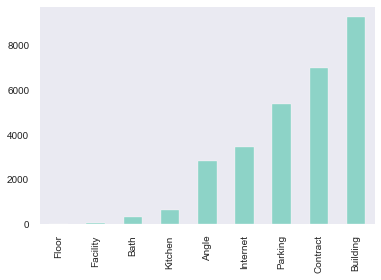

In [46]:
# テストデータの欠損値の可視化
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

count    31470.000000
mean        34.808648
std         18.814245
min          4.860000
25%         22.440000
50%         28.410000
75%         42.390000
max        430.100000
Name: Area, dtype: float64


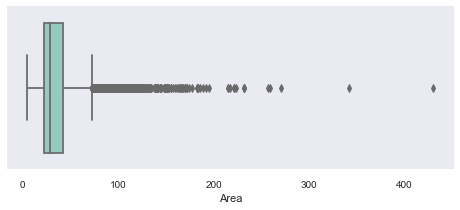

In [47]:
# 面積
sns.set_style("dark")
train["Area"] = train["Area"].str.replace("m2", "").astype(float)
plt.figure(figsize=(8, 3))
sns.boxplot(x=train["Area"])
print(train["Area"].describe())

In [22]:
# 床面積が大きい2つの物件
train.query("Area > 300")

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
20926,20927,116000,東京都荒川区南千住７丁目,日比谷線\t南千住駅\t徒歩7分\t\t京成本線\t千住大橋駅\t徒歩10分\t\t都電荒川...,2LDK,19年11ヶ月,西,430.1,2階／10階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t独立キッチン,インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 432m\t【スーパー】 532m\t【コンビニ】 111m\t【コンビニ】 ...,鉄骨造,NaN
30539,30540,1660000,東京都渋谷区広尾１丁目,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t恵比寿駅\t徒歩6分,4LDK+S(納戸),22年7ヶ月,南,341.3,12階／13階建（地下2階）,温水洗浄便座,給湯／\t冷蔵庫あり,CATV,トランクルーム\tエレベーター,駐車場\t無,NaN,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


id = 20927に関して  
- 面積大きい割に安過ぎない？  
- 2LDKだし
- 荒川区の面積あたりの価格を調べる

count     576.000000
mean     3173.704943
std       758.050467
min       269.704720
25%      2634.020287
50%      3184.355428
75%      3614.478618
max      6758.620690
Name: price_per_area, dtype: float64


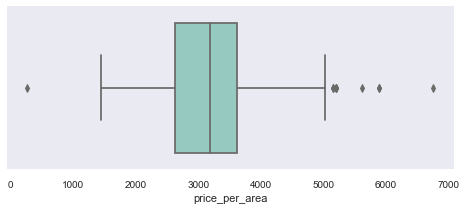

In [25]:
place["Area"] = train["Area"]
place["price_per_area"] = place["target"] / place["Area"]
arakawa = place[place["Place1"]== "荒川"]
plt.figure(figsize=(8, 3))
sns.boxplot(x=arakawa["price_per_area"])
print(arakawa["price_per_area"].describe())

In [26]:
arakawa[arakawa["price_per_area"] == arakawa["price_per_area"].min()]

,Place1,target,Area,price_per_area
20926,荒川,116000,430.1,269.70472


土地面積が異常に大きいのに安い荒川区の物件はミス  
データ数は十分に多いのでひとまず削除する

In [89]:
train.drop(train.query("id==20927").index, inplace=True)

count    31470.000000
mean      3542.071763
std       1095.163372
min        269.704720
25%       2771.528164
50%       3508.771930
75%       4205.183443
max      58621.529469
Name: price_per_area, dtype: float64


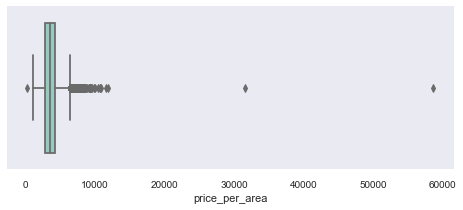

In [27]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=place["price_per_area"])
print(place["price_per_area"].describe())

上位2つは外れ値と思われる　　


In [28]:
# 床面積あたりの価格が大きい2つの物件
place.query("price_per_area >30000")

,Place1,target,Area,price_per_area
5775,港,1203500,20.53,58621.529469
7491,豊島,184000,5.83,31560.891938


In [29]:
# 上記だけだと判断できないので他のデータを見てみる
train.query("id==5776 or id == 7492")

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
5775,5776,1203500,東京都港区新橋４丁目,山手線\t新橋駅\t徒歩2分\t\t都営大江戸線\t汐留駅\t徒歩2分,1K,12年5ヶ月,北西,20.53,10階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tインターネット使用料無料,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 432m\t【スーパー】 570m\t【コンビニ】 43m\t【コンビニ】 2...,RC（鉄筋コンクリート）,2年間
7491,7492,184000,東京都豊島区南長崎５丁目,西武池袋線\t東長崎駅\t徒歩1分\t\t都営大江戸線\t落合南長崎駅\t徒歩9分,2LDK,0年2ヶ月,南,5.83,8階／11階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t室内洗濯機置場／\tエレベーター,"駐車場\t空有\t27,000円(税込)",【コンビニ】 80m\t【銀行】 80m,RC（鉄筋コンクリート）,5年間\t※この物件は\t定期借家\tです。


id = 5776は確かめる必要あり  
  
id = 7492について  
- 2LDKと価格帯的に面積がミス  
- とりあえず消す

In [98]:
train.drop(train.query("id==7492").index, inplace=True)

count     1513.000000
mean      4942.720810
std       1681.170220
min       2480.839048
25%       4335.707649
50%       4842.292315
75%       5369.928401
max      58621.529469
Name: price_per_area, dtype: float64


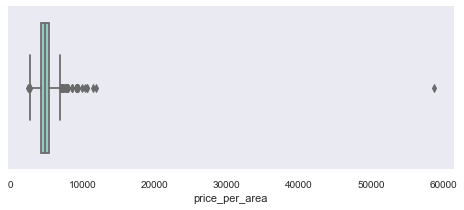

In [107]:
# 港区のデータを可視化
minato = place[place["Place1"]== "港"]
plt.figure(figsize=(8, 3))
sns.boxplot(x=minato["price_per_area"])
print(minato["price_per_area"].describe())

count    1.513000e+03
mean     2.140617e+05
std      1.621924e+05
min      5.500000e+04
25%      1.280000e+05
50%      1.685000e+05
75%      2.490000e+05
max      2.500000e+06
Name: target, dtype: float64


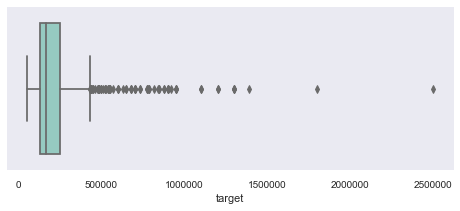

In [110]:
minato = place[place["Place1"]== "港"]
plt.figure(figsize=(8, 3))
sns.boxplot(x=minato["target"])
print(minato["target"].describe())

In [108]:
minato.query("price_per_area >50000")

,Place1,target,Area,price_per_area
5775,港,1203500,20.53,58621.529469


id = 5776の価格も外れ値   
１桁削るとprice_per_areaがほぼ平均なので10で割る

In [30]:
train.query("id==5776")["target"]

5775    1203500
Name: target, dtype: int64

/Users/kyohei/kenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
count     1513.000000
mean      4907.850105
std        959.154949
min       2480.839048
25%       4335.707649
50%       4842.292315
75%       5369.928401
max      11856.926421
Name: price_per_area, dtype: float64


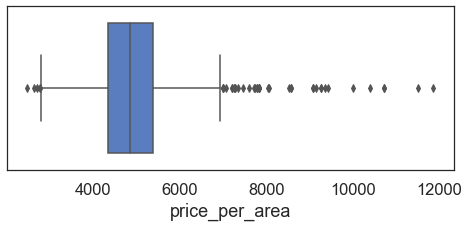

In [130]:
# minato["id"] = train["id"]
# minato.query("id==5776")["target"] /= 10
# minato.query("id==5776")["price_per_area"] /= 10
minato["price_per_area"] = minato["target"] / minato["Area"]
plt.figure(figsize=(8, 3))
sns.boxplot(x=minato["price_per_area"])
print(minato["price_per_area"].describe())

In [53]:
# frequency encording
freq = place["Place"].value_counts()
# カテゴリの出現回数で置換
place["Freq_place"] = place["Place"].map(freq)
print(place["Freq_place"].unique().sum())

31470


In [ ]:
# 

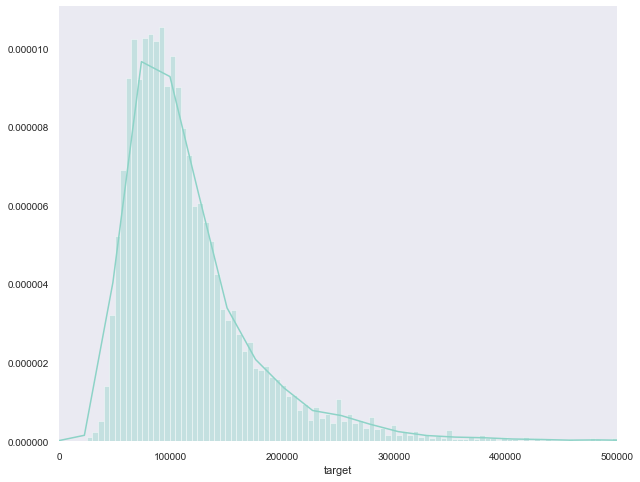

In [48]:
place["target"] = train["target"]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
sns.set(style="white", font_scale=1.5, palette="muted", color_codes=True)
price =  place["target"]
ax.set_xlim([0, 500000])
sns.distplot(price, bins=500)
sns.despine(left=False)

count    3.147000e+04
mean     1.182903e+05
std      7.374880e+04
min      2.500000e+04
25%      7.600000e+04
50%      1.020000e+05
75%      1.360000e+05
max      2.500000e+06
Name: target, dtype: float64


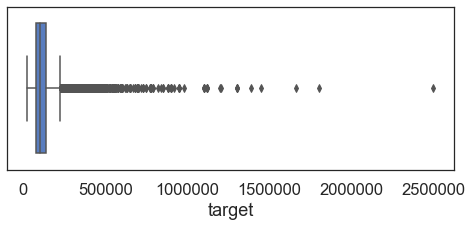

In [112]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=train["target"])
print(train["target"].describe())

- 250万円の住宅あり  
- 外れ値として扱った方がいい？  
- 多く（データの半分）は7~14万  
- 50万以上の住宅が何に起因しているかを調べるべき  

In [5]:
# 50万以上の物件について調べる
high_price = train[train["target"] > 500000]
high_price

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
274,275,650000,東京都品川区上大崎３丁目1-30,山手線\t目黒駅\t徒歩2分\t\t東急目黒線\t不動前駅\t徒歩12分\t\t南北線\t白...,3LDK,2年1ヶ月,北東,79.91m2,30階／38階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,冷房／\tエアコン付／\t床暖房\tトランクルーム\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有\t45,000円\t(※サイズ・空き要確認)",【スーパー】 171m\t【銀行】 114m\t【コンビニ】 137m\t【ドラッグストア】...,RC（鉄筋コンクリート）,4年間\t※この物件は\t定期借家\tです。
666,667,505000,東京都中央区月島１丁目5-1,都営大江戸線\t月島駅\t徒歩1分\t\t都営大江戸線\t勝どき駅\t徒歩11分\t\t東西...,3LDK,4年1ヶ月,南東,111.65m2,53階／53階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付／\t床暖房\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換...,"駐輪場\t空有\t駐車場\t近隣\t43,200円(税込)\t距離300m\tバイク置き場\t無",【スーパー】 219m\t【スーパー】 323m\t【コンビニ】 120m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
671,672,900000,東京都港区赤坂９丁目,千代田線\t乃木坂駅\t徒歩6分\t\t千代田線\t赤坂(東京都)駅\t徒歩7分\t\t都営...,5LDK,14年7ヶ月,東,231.52m2,／3階建（地下1階）,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ4口以上／\tシステムキッチン\t／\tカウンターキッチン\t／\t給...,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,駐車場\t空有\t0円\t距離0m\t(駐輪場有、詳細はお問い合わせください。),NaN,RC（鉄筋コンクリート）,2年間
1295,1296,550000,東京都品川区旗の台１丁目10-3,東急池上線\t旗の台駅\t徒歩5分\t\t東急大井町線\t旗の台駅\t徒歩5分\t\t東急目...,5LDK,45年4ヶ月,南,214.78m2,3階建,バス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\tコンロ3口／\tシステムキッチン,光ファイバー／\tCATV,エアコン付\tバルコニー,駐車場\t空有,【ドラッグストア】 155m\t【飲食店】 217m\t【飲食店】 388m\t【スーパー】...,RC（鉄筋コンクリート）,2年間
1501,1502,1200000,東京都港区元麻布３丁目,南北線\t麻布十番駅\t徒歩9分\t\t都営大江戸線\t六本木駅\t徒歩9分\t\t東京メト...,3LDK,18年6ヶ月,南東,163.62m2,3階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐車場\t空有\t57,000円(税込)",NaN,RC（鉄筋コンクリート）,5年間\t※この物件は\t定期借家\tです。
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29032,29033,700000,東京都港区元麻布１丁目2-2,南北線\t麻布十番駅\t徒歩5分\t\t日比谷線\t六本木駅\t徒歩15分\t\t都営大江戸...,2LDK,0年7ヶ月,NaN,90.04m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ2口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給...,インターネット対応,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tルーフバルコ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 246m\t【スーパー】 256m\t【コンビニ】 311m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
29094,29095,598000,東京都港区三田１丁目,南北線\t麻布十番駅\t徒歩5分\t\t都営大江戸線\t赤羽橋駅\t徒歩6分\t\t都営三田...,2LDK,9年3ヶ月,南西,89.69m2,29階／36階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\tカウンターキッチン,CATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,駐車場\t空有,NaN,SRC（鉄骨鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
29460,29461,505000,東京都中央区月島１丁目,有楽町線\t月島駅\t徒歩2分\t\t都営大江戸線\t月島駅\t徒歩2分\t\t京葉線(東京...,3LDK,4年0ヶ月,南東,111.65m2,53階／53階建（地下2階）,バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\tコンロ3口／\tシステムキッチン,インターネット対応,エアコン付／\t床暖房\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機...,駐車場\t無,【小学校】 589m\t【学校】 656m\t【幼稚園・保育園】 154m\t【郵便局】 2...,RC（鉄筋コンクリート）,2年間
30539,30540,1660000,東京都渋谷区広尾１丁目,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t恵比寿駅\t徒歩6分,4LDK+S(納戸),22年7ヶ月,南,341.3m2,12階／13階建（地下2階）,温水洗浄便座,給湯／\t冷蔵庫あり,CATV,トランクルーム\tエレベーター,駐車場\t無,NaN,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


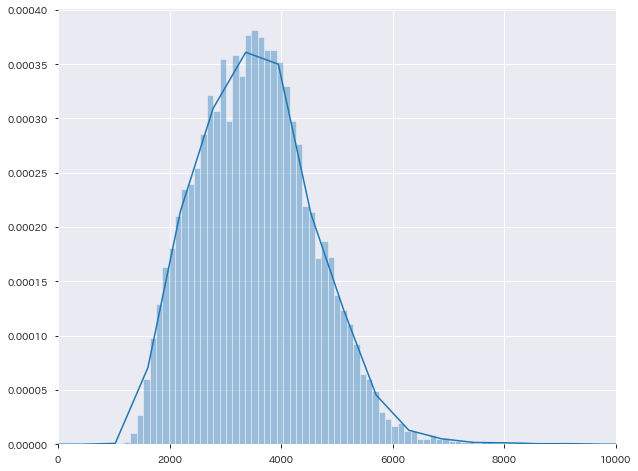

In [76]:
# 1m2あたりの家賃を計算
price_per_area = train["target"] / train["Area"].str.replace('m2', '').astype(float).round()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 10000])
sns.set(style="white", font_scale=1.5, palette="muted", color_codes=True)
sns.distplot(price_per_area, bins=500)
sns.despine(left=False)

count    31470.000000
mean      3598.957153
std       1126.755853
min        269.767442
25%       2809.523810
50%       3564.102564
75%       4280.000000
max      60175.000000
dtype: float64


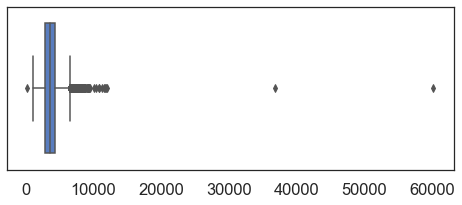

In [131]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=price_per_area)
print(price_per_area.describe())

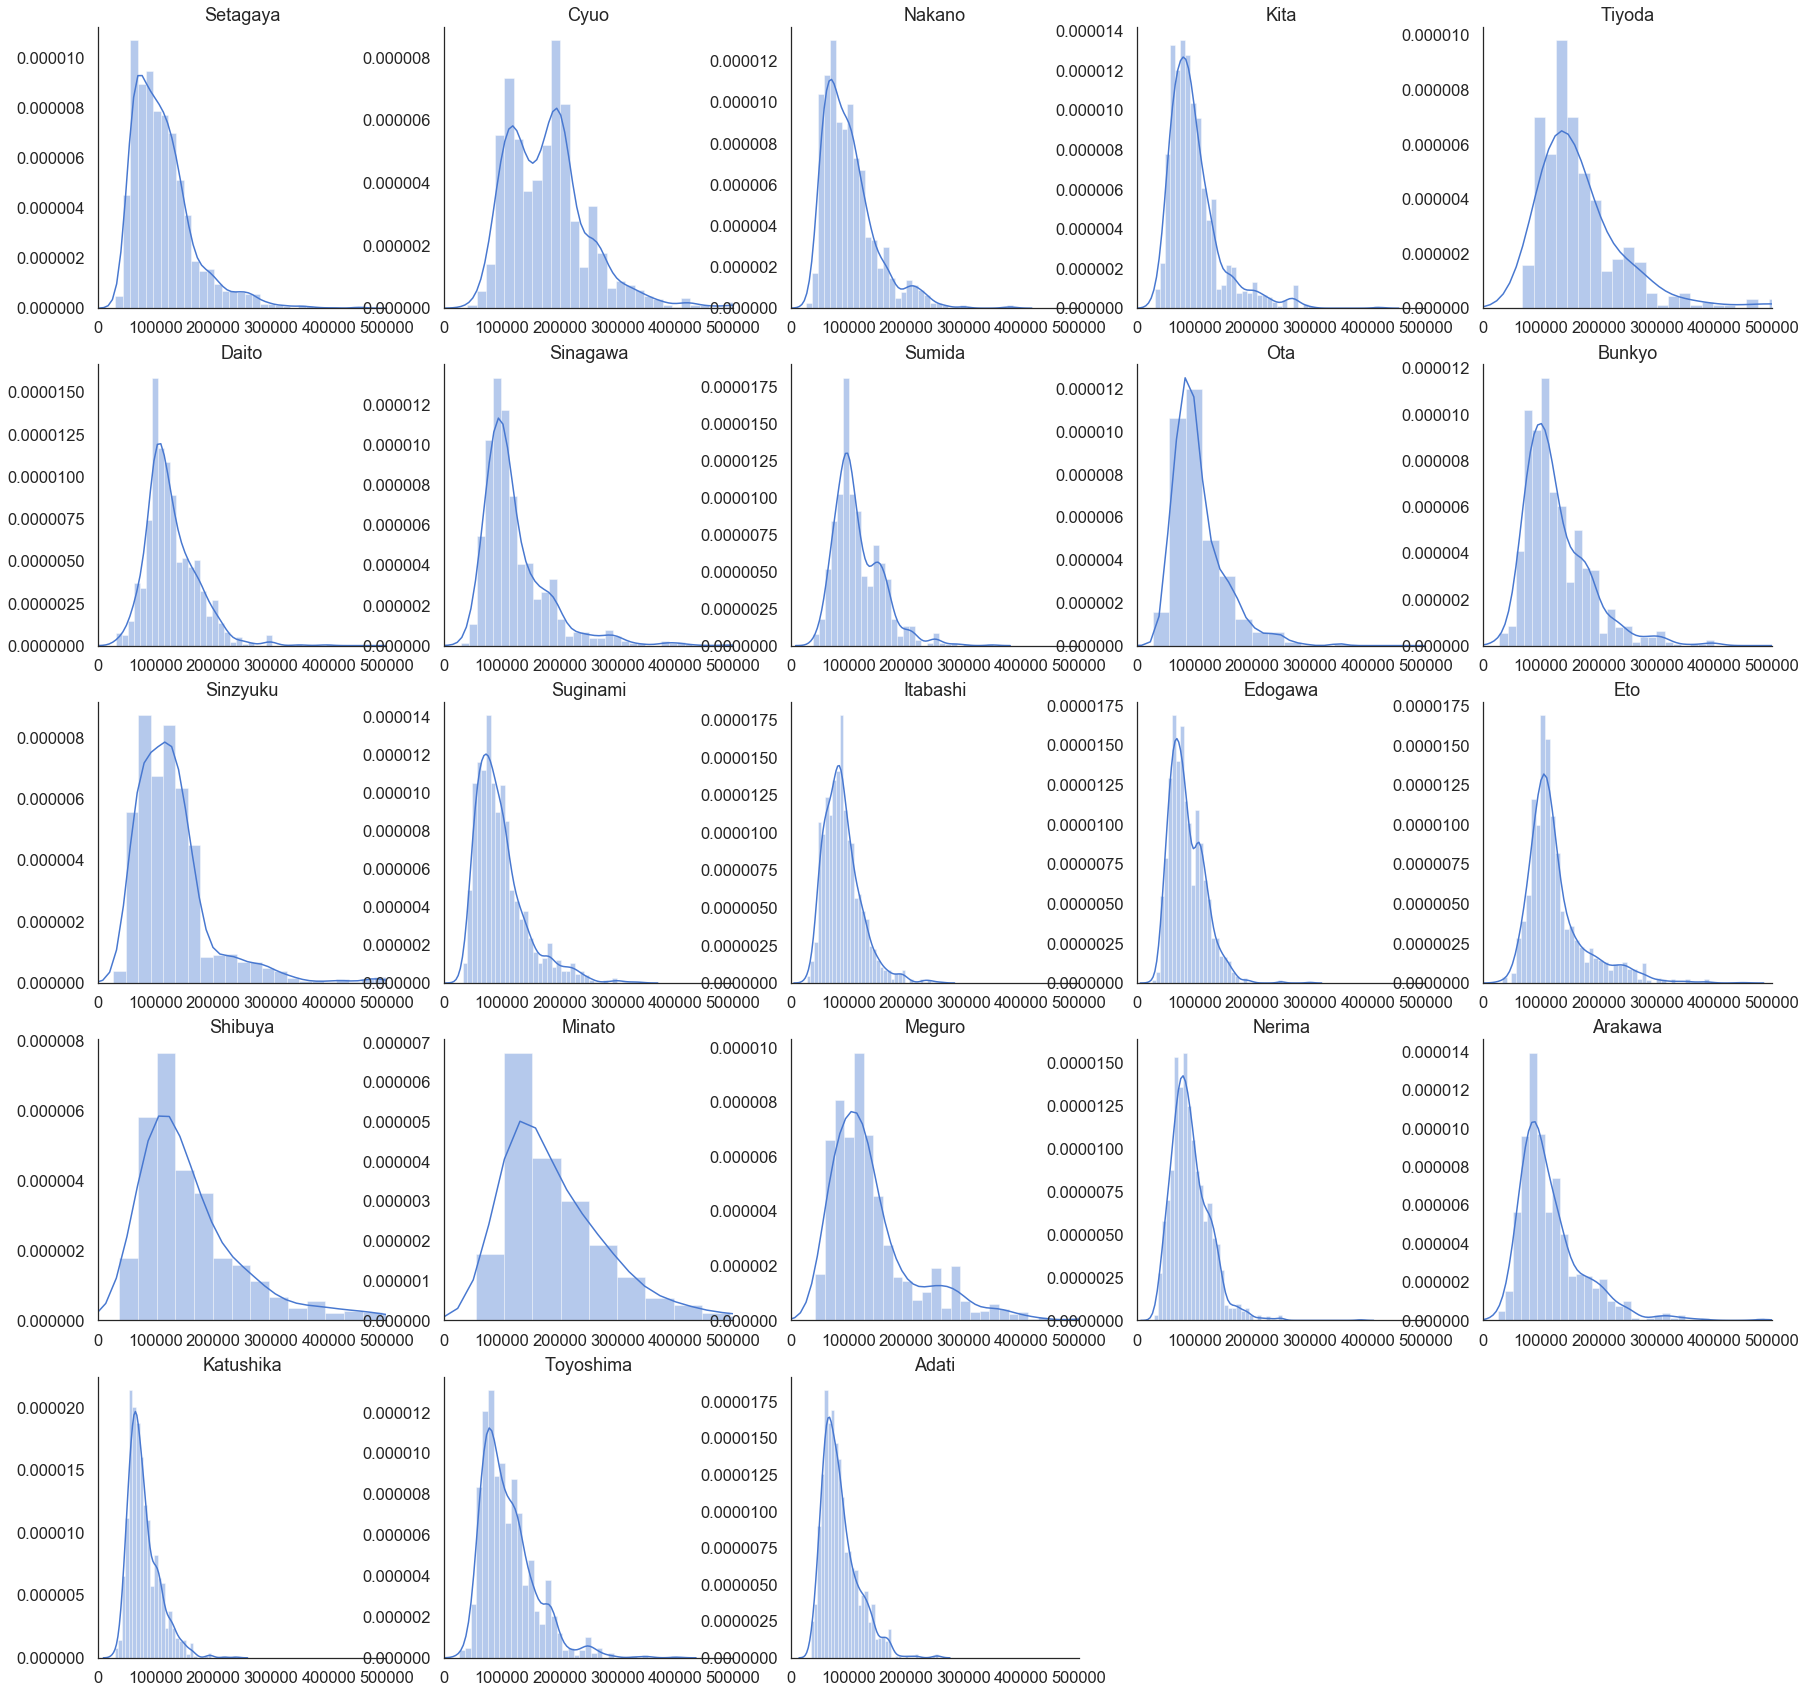

In [132]:
fig = plt.figure(figsize=(30, 30))
for i, column in enumerate(place.columns[:-1]):
    ax = fig.add_subplot(5, 5, i+1)
    sns.set(style="white", font_scale=1.5, palette="muted", color_codes=True)
    price =  place[(place[column] == 1)]["target"]
    ax.set_xlim([0, 500000])
    ax.set_title(column)
    sns.distplot(price)
    sns.despine(left=False)
    ax.set_xlabel("")

In [53]:
place.head()

,Setagaya,Cyuo,Nakano,Kita,Tiyoda,Daito,Sinagawa,Sumida,Ota,Bunkyo,...,Eto,Shibuya,Minato,Meguro,Nerima,Arakawa,Katushika,Toyoshima,Adati,target
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75000
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76000
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,110000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,150000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,74000


In [29]:
room = pd.DataFrame(train["Room"].str[0])
room.columns = ["N_room"]
room.astype(int)

,N_room
0,1
1,1
2,1
3,2
4,2
...,...
31465,2
31466,1
31467,3
31468,1


In [25]:
print(train["Room"].str[1:].unique())

['K' 'R' 'LDK' 'DK' 'LDK+S(納戸)' 'K+S(納戸)' 'DK+S(納戸)' 'LK+S(納戸)']


In [27]:

temp_room = train["Room"].str[1:].replace("R", "")
room["Living"] = temp_room.str.contains("L")
room["Dinnig"] = temp_room.str.contains("D")
room["Kitchen"] = temp_room.str.contains("K")
room["Sroom"] = temp_room.str.contains("S")
room * 1

,N_room,Living,Dinnig,Kitchen,Sroom
0,1,0,0,1,0
1,1,0,0,0,0
2,1,0,0,1,0
3,2,1,1,1,0
4,2,0,1,1,0
...,...,...,...,...,...
31465,2,0,1,1,0
31466,1,0,0,0,0
31467,3,0,1,1,0
31468,1,0,1,1,0


In [50]:
# df = pd.DataFrame()
# for i, column in enumerate(place.columns[:-1]):
#     df[column] = place[(place[columns[i]] == 1)]["target"]

""


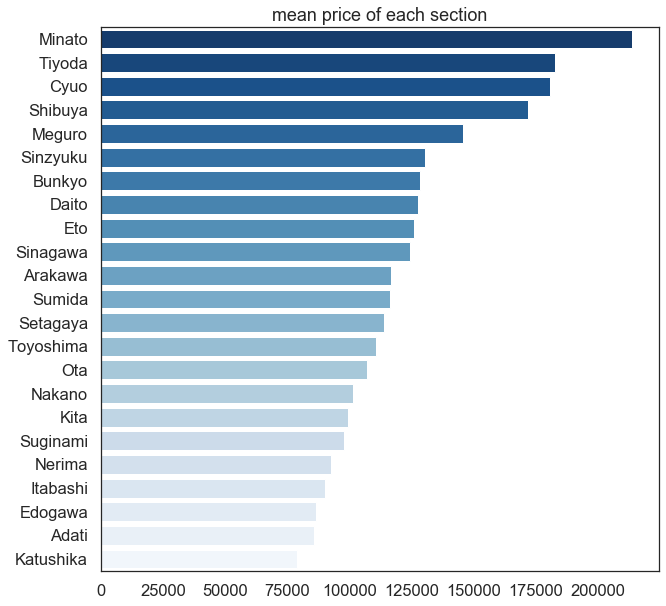

In [35]:
columns = list(place.columns)[:-1]
mean_dict = {}
count_dict = {}
for section in columns:
    count = place[place[section] == 1].shape[0]
    total_price =  place[(place[section] == 1)]["target"].sum()
    mean_price = (total_price / count).round().astype(int)
    mean_dict[section] = mean_price
    count_dict[section] = count

sort= sorted(mean_dict.items(), key=lambda x:x[1], reverse=True)
price = [x[1] for x in sort]
section = [x[0] for x in sort]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.set_palette("Blues_r", 23)
sns.barplot(price, section)
plt.title("mean price of each section")
plt.show()

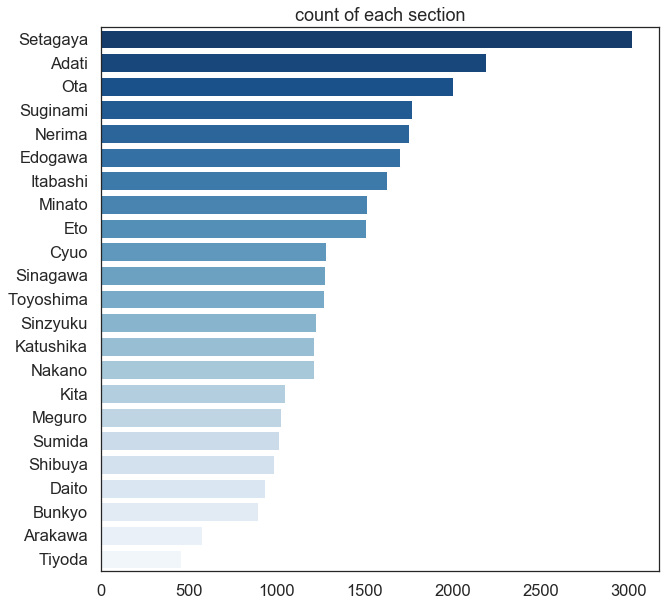

In [37]:
sort= sorted(count_dict.items(), key=lambda x:x[1], reverse=True)
count = [x[1] for x in sort]
section = [x[0] for x in sort]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.set_palette("Blues_r", 23)
sns.barplot(count, section)
plt.title("count of each section")
plt.show()

In [162]:
# 駐車場
# print(train[train["Parking"].str.contains('有', na=False)]["Parking"])
# print(train[train["Parking"].str.contains('無', na=False)]["Parking"])

In [180]:
# 方角の欠損値は欠損値扱い
angle = train["Angle"].str.replace("北西", "1")
angle = angle.str.replace("北東", "1")
angle = angle.str.replace("南西", "3")
angle = angle.str.replace("南東", "3")
angle = angle.str.replace("北", "0")
angle = angle.str.replace("西", "2")
angle = angle.str.replace("東", "2")
angle = angle.str.replace("南", "4")
angle = angle.fillna("2").astype(int)
angle

0        3
1        2
2        4
3        4
4        4
        ..
31465    4
31466    2
31467    4
31468    4
31469    3
Name: Angle, Length: 31470, dtype: int64

In [54]:
# 実験
df = pd.Series(["1/2", "1/", "/2", "2"])
# df = df.where(df.str.startswith("/") == False,)
df = df.str.split('/')
new_df = pd.DataFrame(df.str).T
# new_df[0].where(new_df[0] == "", 5)
new_df[0].mask(new_df[0] == "", new_df[1])

0    1
1    1
2    2
3    2
Name: 0, dtype: object

In [75]:
# 所在階
floor = train["Floor"].str.replace('地下', '-').str.replace('階', '').str.split('／')
floor = pd.DataFrame(floor.str, index=["LiveFloor", "MaxFloor"]).T

# 最上階について
max_floor = floor['MaxFloor'].fillna(floor['LiveFloor']).str.replace("建", "").str.split("（")
max_floor = pd.DataFrame(max_floor.str, index=["MaxFloor", "UnderFloor"]).T

# 所在階について
live_floor = floor["LiveFloor"].str.replace("建", "").str.split("（")
live_floor = pd.DataFrame(live_floor.str, index=["LiveFloor", "UnderFloor"]).T
live_floor["LiveFloor"].mask(live_floor["LiveFloor"] == "", max_floor["MaxFloor"], inplace=True)

max_floor = max_floor["MaxFloor"].astype(int)
live_floor = live_floor["LiveFloor"].astype(int)
floor = pd.concat([live_floor, max_floor], axis=1)
floor["RatioFloor"] = ((live_floor / max_floor)*100).round()
# ratio_floor = pd.DataFrame("")
floor

,LiveFloor,MaxFloor,RatioFloor
0,1,12,8.0
1,5,10,50.0
2,12,15,80.0
3,3,4,75.0
4,1,2,50.0
...,...,...,...
31465,1,3,33.0
31466,4,4,100.0
31467,3,5,60.0
31468,1,2,50.0


In [67]:
train[train["id"] == 24975]

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
24974,24975,153000,東京都港区六本木２丁目,南北線\t六本木一丁目駅\t徒歩3分\t\t日比谷線\t六本木駅\t徒歩8分\t\t千代田線...,1R,13年6ヶ月,北西,29.67m2,地下10階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ／\t...,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐車場\t空有\t37,800円(税込)\t(屋外、形状(機械)、地上、屋根無)\t駐輪場\...",NaN,RC（鉄筋コンクリート）,2年間


### LiveFloor  
- 建があるところはMaxFloorに移してから()内の数字を用いる    
- ""はおそらく,   /3階建  のようなセルと思われる  
- ""はMaxFloorで補間したい
- 地下は日当たりとかなくて安そうなのでー（EDAで確かめる必要あり）  
### MaxFloor  
- 建てを消す  
- ()が地下の存在を示しているだけ  
- 106 -> 110


In [12]:
# 所在地
place = train["Place"].str.replace("東京都", "").str.split("区")
place = pd.DataFrame(place.str, index=["Place1", "Place2"]).T
place = place["Place1"].str.replace("港", "0")
place = place.str.replace("千代田", "0")
place = place.str.replace("中央", "0")
place = place.str.replace("渋谷", "0")
place = place.str.replace("目黒", "0")

place = place.str.replace("新宿", "1")
place = place.str.replace("文京", "1")
place = place.str.replace("台東", "1")
place = place.str.replace("江東", "1")
place = place.str.replace("品川", "1")

place = place.str.replace("荒川", "2")
place = place.str.replace("墨田", "2")
place = place.str.replace("世田谷", "2")
place = place.str.replace("豊島", "2")
place = place.str.replace("大田", "2")

place = place.str.replace("中野", "3")
place = place.str.replace("北", "3")
place = place.str.replace("杉並", "3")
place = place.str.replace("練馬", "3")
place = place.str.replace("板橋", "3")

place = place.str.replace("江戸川", "4")
place = place.str.replace("足立", "4")
place = place.str.replace("葛飾", "4")
place = pd.DataFrame(place).astype(int)
place

,Place1
0,3
1,0
2,0
3,3
4,4
...,...
31465,3
31466,2
31467,1
31468,3


Passed
count  31470.000000
mean      15.771592
std       15.075781
min        0.000000
25%        3.000000
50%       13.000000
75%       27.000000
max     1019.000000


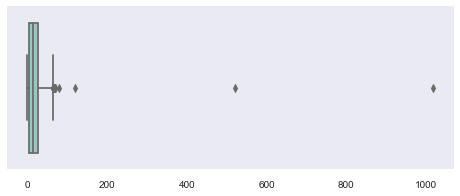

In [16]:
# 築年数
passed = train["Passed"].str.replace("新築", "0年").str.split("年", expand=True)
passed = pd.DataFrame(passed[0]).astype(int)
passed.columns = ["Passed"]
plt.figure(figsize=(8, 3))
sns.boxplot(x=passed)
print(passed.describe())

In [17]:
passed.query("Passed > 100")

,Passed
20231,520
20427,1019
22247,119


In [19]:
train.query("id==22248 or id==20428 or id == 20232")

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
20231,20232,112000,東京都板橋区蓮根３丁目,都営三田線\t西台駅\t徒歩7分\t\t都営三田線\t蓮根駅\t徒歩7分,2DK+S(納戸),520年5ヶ月,南,51.30,3階／3階建,専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,コンロ設置可（コンロ3口）／\t給湯,光ファイバー／\tCATV,エアコン付\t出窓／\tバルコニー／\tフローリング／\t室内洗濯機置場／\tタイル張り,NaN,NaN,鉄骨造,NaN
20427,20428,82000,東京都目黒区中町２丁目,東急東横線\t祐天寺駅\t徒歩11分\t\t東急東横線\t中目黒駅\t徒歩15分\t\t東急...,1DK,1019年7ヶ月,南,24.00,2階／2階建,専用トイレ／\tバス・トイレ別／\tシャワー,コンロ設置可（コンロ2口）,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタ...,NaN,NaN,鉄骨造,NaN
22247,22248,52000,東京都世田谷区砧７丁目,小田急小田原線\t祖師ケ谷大蔵駅\t徒歩10分\t\t小田急小田原線\t成城学園前駅\t徒歩15分,1K,119年5ヶ月,NaN,18.15,1階／2階建,専用トイレ,コンロ設置可（コンロ2口）,NaN,エアコン付\t公営水道,NaN,NaN,木造,NaN


In [ ]:
# 築年数がおかしいので削除
train.drop(train.query("id==20428 or id == 20232").index, inplace=True)

In [8]:
print(train["Material"].nunique())
print(test["Material"].unique())
material = pd.get_dummies(train["Material"])
material["target"] = train["target"]
material.head()

10
['鉄骨造' 'RC（鉄筋コンクリート）' '木造' 'SRC（鉄骨鉄筋コンクリート）' '軽量鉄骨' 'ALC（軽量気泡コンクリート）'
 'その他' 'HPC（プレキャスト・コンクリート（重量鉄骨））' 'PC（プレキャスト・コンクリート（鉄筋コンクリート））' '鉄筋ブロック'
 'ブロック']


,ALC（軽量気泡コンクリート）,HPC（プレキャスト・コンクリート（重量鉄骨））,PC（プレキャスト・コンクリート（鉄筋コンクリート））,RC（鉄筋コンクリート）,SRC（鉄骨鉄筋コンクリート）,その他,ブロック,木造,軽量鉄骨,鉄骨造,target
0,0,0,0,1,0,0,0,0,0,0,75000
1,0,0,0,0,0,0,0,0,0,1,76000
2,0,0,0,1,0,0,0,0,0,0,110000
3,0,0,0,1,0,0,0,0,0,0,150000
4,0,0,0,0,0,0,0,1,0,0,74000


/Users/kyohei/kenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kyohei/kenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27873 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kyohei/kenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/kyohei/kenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27873 missing from current font.
  font.set_text(s, 0, flags=flags)


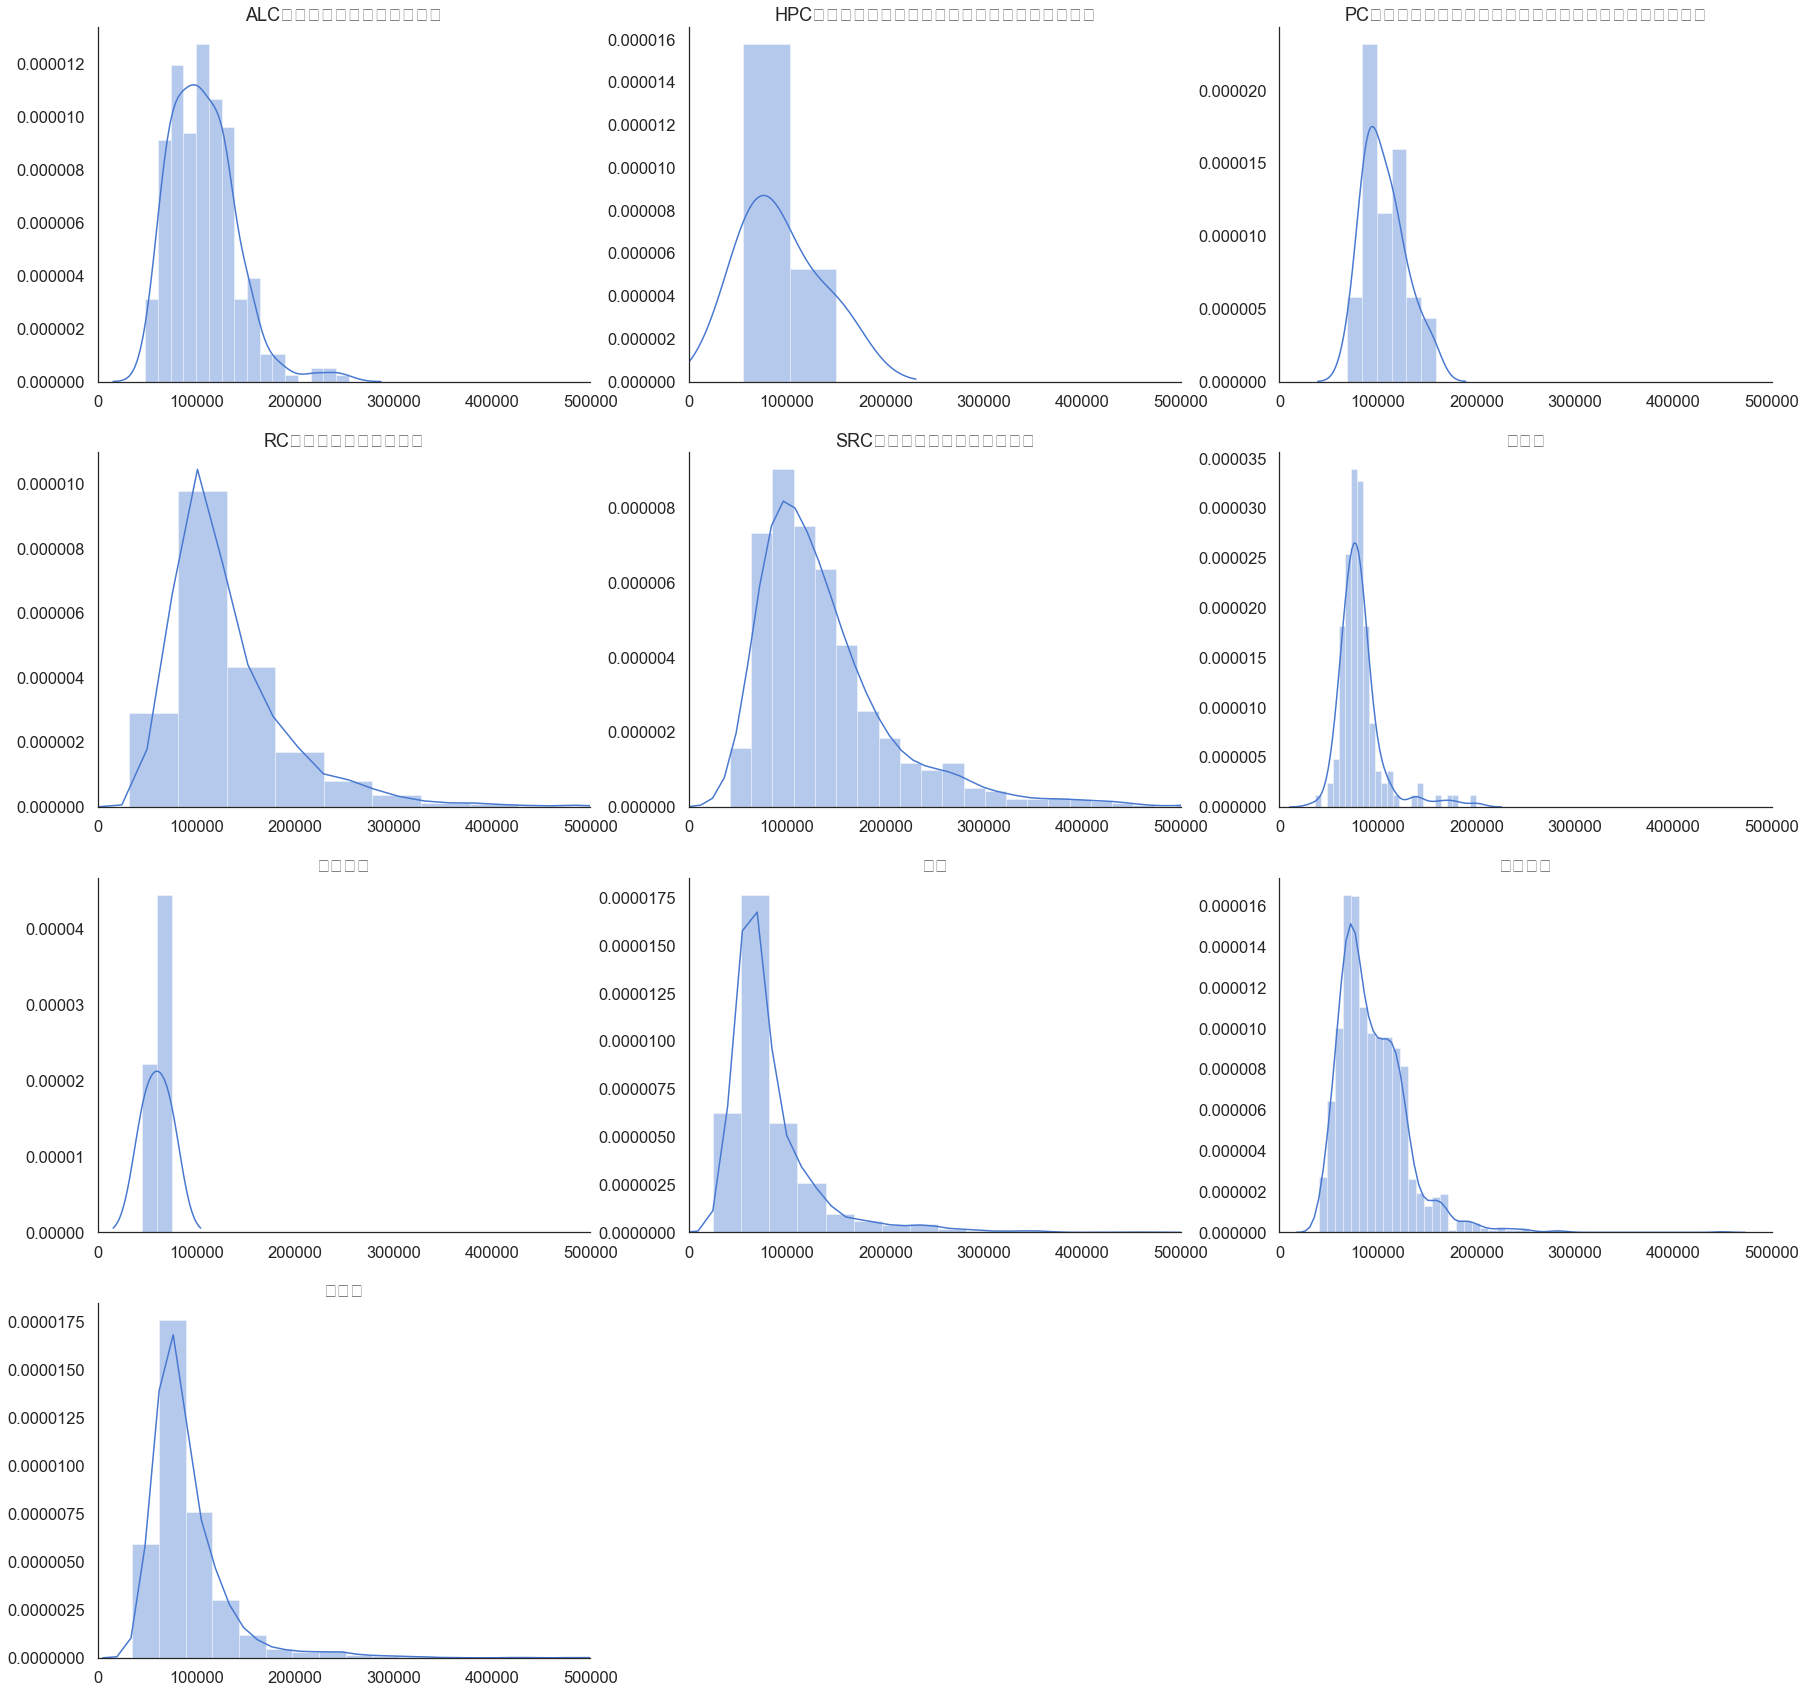

In [5]:
fig = plt.figure(figsize=(30, 30))
for i, column in enumerate(material.columns[:-1]):
    ax = fig.add_subplot(4, 3, i+1)
    sns.set(style="white", font_scale=1.5, palette="muted", color_codes=True)
    material1 =  material[(material[column] == 1)]["target"]
    ax.set_xlim([0, 500000])
    ax.set_title(column)
    sns.distplot(material1)
    sns.despine(left=False)
    ax.set_xlabel("")

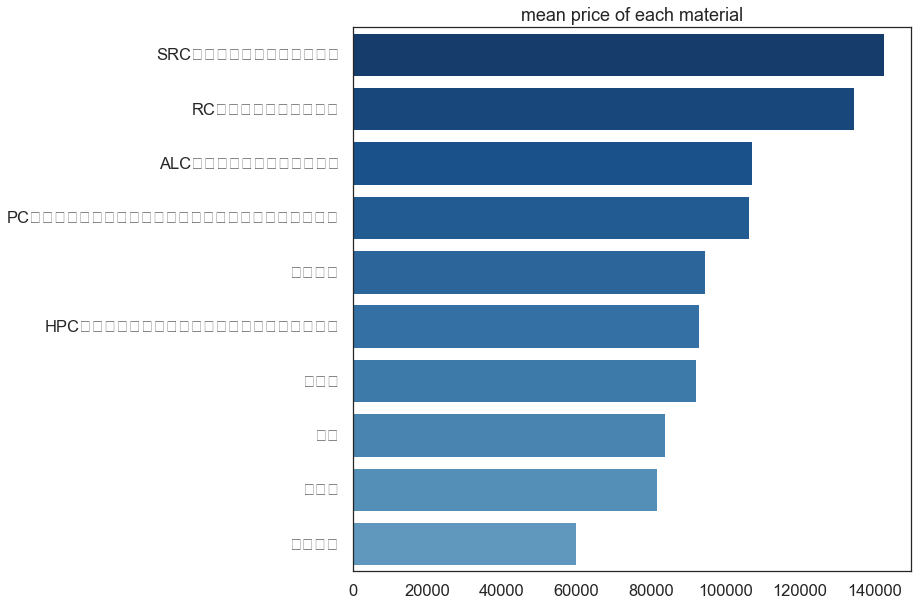

['SRC（鉄骨鉄筋コンクリート）', 'RC（鉄筋コンクリート）', 'ALC（軽量気泡コンクリート）', 'PC（プレキャスト・コンクリート（鉄筋コンクリート））', '軽量鉄骨', 'HPC（プレキャスト・コンクリート（重量鉄骨））', '鉄骨造', '木造', 'その他', 'ブロック']


In [7]:
columns = list(material.columns)[:-1]
mean_dict = {}
count_dict = {}
for column in columns:
    count = material[material[column] == 1].shape[0]
    total_price =  material[(material[column] == 1)]["target"].sum()
    mean_price = (total_price / count).round().astype(int)
    mean_dict[column] = mean_price
    count_dict[column] = count

sort= sorted(mean_dict.items(), key=lambda x:x[1], reverse=True)
price = [x[1] for x in sort]
mate = [x[0] for x in sort]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.set_palette("Blues_r", 23)
sns.barplot(price, mate)
plt.title("mean price of each material")
plt.show()
print(mate)

In [16]:
material = train["Material"].str.replace("SRC（鉄骨鉄筋コンクリート）", "0")
material = material.str.replace("RC（鉄筋コンクリート）", "0")
material = material.str.replace("ALC（軽量気泡コンクリート）", "1")
material = material.str.replace("PC（プレキャスト・コンクリート（鉄筋コンクリート））", "1")
material = material.str.replace("軽量鉄骨", "2")
material = material.str.replace("HPC（プレキャスト・コンクリート（重量鉄骨））", "2")
material = material.str.replace("鉄骨造", "2")
material = material.str.replace("木造", "3")
material = material.str.replace("その他", "3")
material = material.str.replace("ブロック", "4")
material = material.str.replace("その他", "4")
material.unique()

array(['0', '2', '3', '1', '4'], dtype=object)

In [1]:
# def feature_arrange(df, type):
#     # 所在地
#     place = df["Place"].str.replace("東京都", "").str.split("区")
#     place = pd.DataFrame(place.str, index=["Place1", "Place2"]).T
#     place = pd.get_dummies(place["Place1"])
#     place = place.rename(columns={'世田谷': 'Setagaya', '中央': 'Cyuo', '中野': 'Nakano',
#                                   '北': 'Kita', '千代田': 'Tiyoda', '台東': 'Daito',
#                                   '品川': 'Sinagawa', '墨田': 'Sumida', '大田': 'Ota',
#                                   '文京': 'Bunkyo', '新宿': 'Sinzyuku', '杉並': 'Suginami',
#                                   '板橋': 'Itabashi', '江戸川': 'Edogawa', '江東': 'Eto',
#                                   '渋谷': 'Shibuya', '港': 'Minato', '目黒': 'Meguro', '練馬': 'Nerima',
#                                   '荒川': 'Arakawa', '葛飾': 'Katushika', '豊島': 'Toyoshima',
#                                   '足立': 'Adati'})
#     # 間取り、方角, 建物構造
#     # room = pd.get_dummies(df["Room"].str.replace("納戸", ""))
#     angle = pd.get_dummies(df["Angle"])
#     angle = angle.rename(columns={"北": "N", "北東": "NE", "北西": "NW", "南": "S",
#                                   "南東": "SE", "南西": "SW", "東": "E", "西": "W" })
#     material = pd.get_dummies(df["Material"].str.replace("鉄筋ブロック", "ブロック"))
#     material = material.rename(columns={'ALC（軽量気泡コンクリート）': 'ALC', 'HPC（プレキャスト・コンクリート（重量鉄骨））': 'HPC',
#                                         'PC（プレキャスト・コンクリート（鉄筋コンクリート））': 'PC', 'RC（鉄筋コンクリート）': 'RC',
#                                         'SRC（鉄骨鉄筋コンクリート）': 'SRC', 'その他': 'Other','ブロック': 'Block',
#                                         '木造': 'Wood', '軽量鉄骨': "LSteel", '鉄骨造': 'Steel'})
#     # 築年数の前処理
#     passed = df["Passed"].str.replace("新築", "0年").str.split("年", expand=True)
#     passed = pd.DataFrame(passed[0]).astype(int)

#     # 面積
#     area = df["Area"].str.replace('m2', '').astype(float).astype(int)

#     # 所在階
#     floor = df["Floor"].str.replace('地下[1-9]{1,}', '').str.replace('階', '').str.replace('（）', '').str.replace('建', '').str.split('／')
#     floor = pd.DataFrame(floor.str, index=["Floor", "MaxFloor"]).T
#     floor["MaxFloor"] = floor['MaxFloor'].fillna(floor['Floor'])
#     floor["MaxFloor"] = floor['MaxFloor'].fillna("4")  # テストデータの欠損値を埋める用
#     max_floor = floor["MaxFloor"].astype(int)
    
#     # 浴槽とか
#     bath = pd.DataFrame(train["Bath"].str.split("／", expand=True).nunique(axis=1), columns=["Bath"])
#     kitchen = pd.DataFrame(train["Kitchen"].str.split("／", expand=True).nunique(axis=1), columns=["Kitchen"])
#     facility = pd.DataFrame(train["Facility"].str.split("／", expand=True).nunique(axis=1), columns=["Facility"])
#     internet = pd.DataFrame(train["Internet"].str.split("／", expand=True).nunique(axis=1), columns=["Internet"])
#     if type == "train":
#         target = df['target']
#         new_df = pd.concat([target, place, passed, angle, area, max_floor, material, bath, kitchen, facility, internet], axis=1)
#     else:
#         new_df = pd.concat([place, passed, angle, area, max_floor, material], axis=1)
#     return new_df

In [2]:
train = feature_arrange(train, type="train")
test = feature_arrange(test, type="test")

NameError: name 'train' is not defined

In [3]:
print(len(train.columns))
print(len(test.columns))

NameError: name 'train' is not defined

In [4]:
print(train.columns)
print(test.columns)

NameError: name 'train' is not defined

訓練データとテストデータでカテゴリが違うのでonehotだと噛み合わない

In [5]:
X_train = train.drop(['target'], axis=1)
y_train = train['target']
X_test = test

NameError: name 'train' is not defined

In [6]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y_pred = np.zeros(X_test.shape[0], dtype='float32')
train_pred = np.zeros(X.shape[0], dtype='float32')

cv_score = 0
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_val, y_val)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': -1,
    'num_leaves': 255,
    'max_bin': 255,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'nthread': -1,
    'bagging_freq': 1,
    'verbose': -1,
    'seed': 1,
}

model = lgb.LGBMClassifier(**params)
    


model = lgb.train(params, train_data, valid_sets=[train_data, valid_data],
                  num_boost_round=5000, early_stopping_rounds=200,
                  verbose_eval=200)

y_val_pred = model.predict(X_val)
val_score = np.sqrt(mean_squared_error(y_val, y_val_pred))
print('RMSE:', val_score)

y_pred += model.predict(X_test, num_iteration=model.best_iteration)

cv_score += val_score
print(cv_score)

OSError: dlopen(/Users/kyohei/kenv/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/kyohei/kenv/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [ ]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
feature_importances['importance'] = model.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.head(50), x='importance', y='feature')

In [ ]:
submit = pd.read_csv('../input/sample_submit.csv', names=('id', 'target'))
submit['target'] = y_pred
submit.head(10)

submit.to_csv('submit_kernel_01.csv', header=False, index=False)